# **Fallecidos por COVID-19 - [Ministerio de Salud - MINSA]**

![](https://www.cancer.org/es/noticias-recientes/preguntas-comunes-acerca-del-brote-del-nuevo-coronavirus/_jcr_content/par/image.img.jpg/1586550990157.jpg)



### **Objetivo**: *Hacer un análisis exploratorio del dataset, en particular de las Series Temporales*

---

Es el registro diario de muertes por Covid-19. Cada registro es igual a una persona, la cual puede caracterizarse por sexo, edad y ubicación geográfica hasta nivel de distrito; además, el 06.mayo.2021 se agregó el código UBIGEO.

Desde que se publicó este dataset, cada registro representaba un fallecido confirmado por covid-19, quienes cumplen con criterios clínicos y de laboratorio (prueba molecular, antigénica o pruebas serológicas).  A partir del 31.mayo.2021 se cambió el criterio de “Fallecidos por Covid-19” por “Muertes por Covid-19” y como resultado el dataset creció casi al triple en el número de registros. Esta nueva clasificación está definida por el cumplimiento de al menos uno de los siguientes siete criterios técnicos:

·        Criterio virológico: Muerte en un caso confirmado de COVID-19 que fallece en los 60 días posteriores a una prueba molecular (PCR) o antigénica reactiva para SARS-CoV-2.

·        Criterio serológico: Muerte en un caso confirmado de COVID-19 que fallece en los 60 días posteriores a una prueba serológica positiva IgM o IgM/IgG para SARS-CoV-2.

·        Criterio radiológico: Muerte en un caso probable de COVID-19 que presenta una imagen radiológica, tomográfica o de resonancia magnética nuclear compatible con neumonía COVID-19.

·        Criterio nexo epidemiológico: Muerte en un caso probable de COVID-19 que presenta nexo epidemiológico con un caso confirmado de COVID-19.

·        Criterio investigación epidemiológica: Muerte en un caso sospechoso de COVID-19 que es verificado por investigación epidemiológica de la Red Nacional de Epidemiología (RENACE).

·        Criterio clínico: Muerte en un caso sospechoso de COVID-19 que presenta cuadro clínico compatible con la enfermedad.

·        Criterio SINADEF Muerte con certificado de defunción en el que se presenta el diagnóstico de COVID-19 como causa de la muerte.  El fallecimiento por COVID-19 en el certificado de defunción está definido por la presencia en los campos A, B, C o D de los códigos CIE-10: U071, U072, B342, B972, o la mención de los términos “coronavirus”, “cov-2”, “cov2”, “covid” y “sars”.




### ENUNCIADO DEL CONSOLIDADO 1

<COLOQUE AQUÍ LOS INTEGRANTES DEL GRUPO>

Instrucciones: Completar el código Python que corresponden a cada pregunta

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Obtener Datos**
Obtener los datos desde el siguiente enlace: 
https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa

Pregunta 1: Descargar el dataset (0.5 pto)

In [2]:
!wget -O dataset.csv https://cloud.minsa.gob.pe/s/xJ2LQ3QyRW38Pe5/download

--2022-05-07 16:48:58--  https://cloud.minsa.gob.pe/s/xJ2LQ3QyRW38Pe5/download
Resolving cloud.minsa.gob.pe (cloud.minsa.gob.pe)... 104.18.20.224, 104.18.21.224, 2606:4700::6812:14e0, ...
Connecting to cloud.minsa.gob.pe (cloud.minsa.gob.pe)|104.18.20.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20108882 (19M) [text/csv]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  19.18M  6.10MB/s    in 3.1s    

2022-05-07 16:49:05 (6.10 MB/s) - ‘dataset.csv’ saved [20108882/20108882]



### **Leer Datos**

Pregunta 2: Colocar los datos del archivo .csv hacia un dataframe (0.5 ptos)

In [31]:
df=pd.read_csv("dataset.csv",sep=";",parse_dates=["FECHA_CORTE","FECHA_FALLECIMIENTO"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211865 entries, 0 to 211864
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FECHA_CORTE          211865 non-null  datetime64[ns]
 1   FECHA_FALLECIMIENTO  211865 non-null  datetime64[ns]
 2   EDAD_DECLARADA       211865 non-null  int64         
 3   SEXO                 211865 non-null  object        
 4   CLASIFICACION_DEF    211865 non-null  object        
 5   DEPARTAMENTO         211865 non-null  object        
 6   PROVINCIA            211860 non-null  object        
 7   DISTRITO             211860 non-null  object        
 8   UBIGEO               211865 non-null  object        
 9   UUID                 207966 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 16.2+ MB


In [34]:
df

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,2022-03-19,2021-04-23,41,MASCULINO,Criterio virolÃ³gico,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,24769779.0
1,2022-03-19,2021-06-07,31,FEMENINO,Criterio SINADEF,CALLAO,CALLAO,CALLAO,070101,24742499.0
2,2022-03-19,2021-07-08,27,FEMENINO,Criterio SINADEF,LIMA,LIMA,CARABAYLLO,150106,24742552.0
3,2022-03-19,2021-05-18,62,MASCULINO,Criterio virolÃ³gico,JUNIN,TARMA,TARMA,120701,24633504.0
4,2022-03-19,2021-05-19,74,MASCULINO,Criterio virolÃ³gico,LIMA,LIMA,SANTA ANITA,150137,24633522.0
...,...,...,...,...,...,...,...,...,...,...
211860,2022-03-19,2021-04-20,77,MASCULINO,Criterio clÃ­nico,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,NaN
211861,2022-03-19,2021-02-06,43,MASCULINO,Criterio virolÃ³gico,LORETO,MAYNAS,IQUITOS,160101,NaN
211862,2022-03-19,2020-06-20,23,FEMENINO,Criterio SINADEF,PIURA,PIURA,VEINTISEIS DE OCTUBRE,200115,NaN
211863,2022-03-19,2020-07-04,74,MASCULINO,Criterio clÃ­nico,HUANUCO,LEONCIO PRADO,RUPA-RUPA,100601,NaN


Pregunta 3: Eliminar las filas que contienen registros nulos. (1 pto)

In [35]:
df.isnull().sum()

FECHA_CORTE               0
FECHA_FALLECIMIENTO       0
EDAD_DECLARADA            0
SEXO                      0
CLASIFICACION_DEF         0
DEPARTAMENTO              0
PROVINCIA                 5
DISTRITO                  5
UBIGEO                    0
UUID                   3899
dtype: int64

In [36]:
df.dropna(inplace=True)
df.isnull().sum()

FECHA_CORTE            0
FECHA_FALLECIMIENTO    0
EDAD_DECLARADA         0
SEXO                   0
CLASIFICACION_DEF      0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
UBIGEO                 0
UUID                   0
dtype: int64

Pregunta 4: Mostrar la cantidad de fallecidos del departamento de JUNIN (1 pto)

,id_persona
SEXO,
FEMENINO,2479
MASCULINO,4488


In [37]:
df[["SEXO","UUID"]][df["DEPARTAMENTO"]=="JUNIN"].groupby("SEXO").count()

,UUID
SEXO,
FEMENINO,2643
MASCULINO,4723


Pregunta 5: Mostrar el gráfico de barras de la cantidad de fallecidos del departamento de JUNIN, agrupados por SEXO. Utilice plot. (2 ptos)

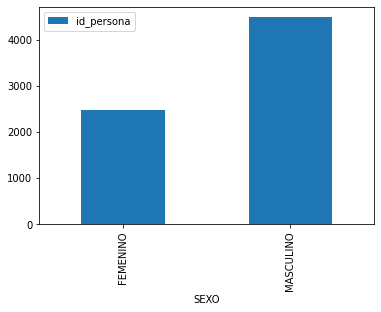

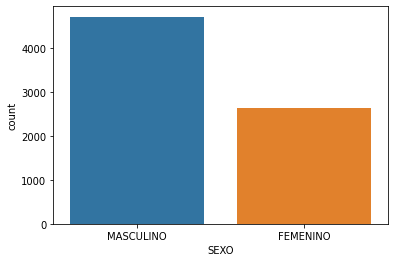

In [38]:
sns.countplot(data=df[["SEXO","UUID"]][df["DEPARTAMENTO"]=="JUNIN"],x="SEXO")

Pregunta 6: Mostrar la cantidad de fallecidos por cada distrito, en los distritos de Huancayo, El Tambo y Chilca; agrupados por SEXO (2 ptos)

DISTRITO  SEXO     
CHILCA    FEMENINO     232
          MASCULINO    414
EL TAMBO  FEMENINO     464
          MASCULINO    859
HUANCAYO  FEMENINO     435
          MASCULINO    745
dtype: int64

In [39]:
# df[["SEXO","UUID"]][df["DEPARTAMENTO"]=="JUNIN"]
df[(df["DISTRITO"]=="EL TAMBO") | (df["DISTRITO"]=="CHILCA") | (df["DISTRITO"]=="HUANCAYO")].groupby(["DISTRITO","SEXO"]).size()

DISTRITO  SEXO     
CHILCA    FEMENINO     244
          MASCULINO    431
EL TAMBO  FEMENINO     481
          MASCULINO    889
HUANCAYO  FEMENINO     459
          MASCULINO    770
dtype: int64

In [40]:
df[(df["DEPARTAMENTO"]=="JUNIN") & ((df["DISTRITO"]=="EL TAMBO") | (df["DISTRITO"]=="CHILCA") | (df["DISTRITO"]=="HUANCAYO"))].groupby(["DISTRITO","SEXO"]).size()

DISTRITO  SEXO     
CHILCA    FEMENINO     200
          MASCULINO    358
EL TAMBO  FEMENINO     481
          MASCULINO    889
HUANCAYO  FEMENINO     459
          MASCULINO    770
dtype: int64

Pregunta 7: Mostrar el gráfico de barras de la cantidad de fallecidos en cada distrito de Huancayo, El Tambo y Chilca; agrupados por SEXO. Utilice seaborn. (2 ptos)

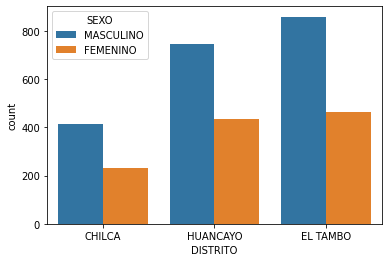

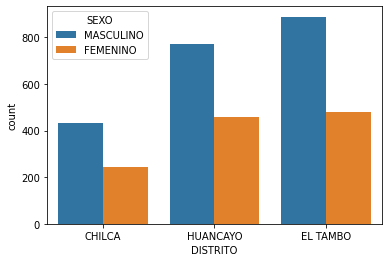

In [41]:
sns.countplot(data=df[(df["DISTRITO"]=="EL TAMBO") | (df["DISTRITO"]=="CHILCA") | (df["DISTRITO"]=="HUANCAYO")],x="DISTRITO",hue="SEXO")

Pregunta 8: Mostrar la gráfica de la cantidad de fallecidos por cada día a nivel nacional. En el eje X debe estar la fecha y el eje Y debe mostrar la cantidad de fallecidos. Usar plot. (1 pto)  

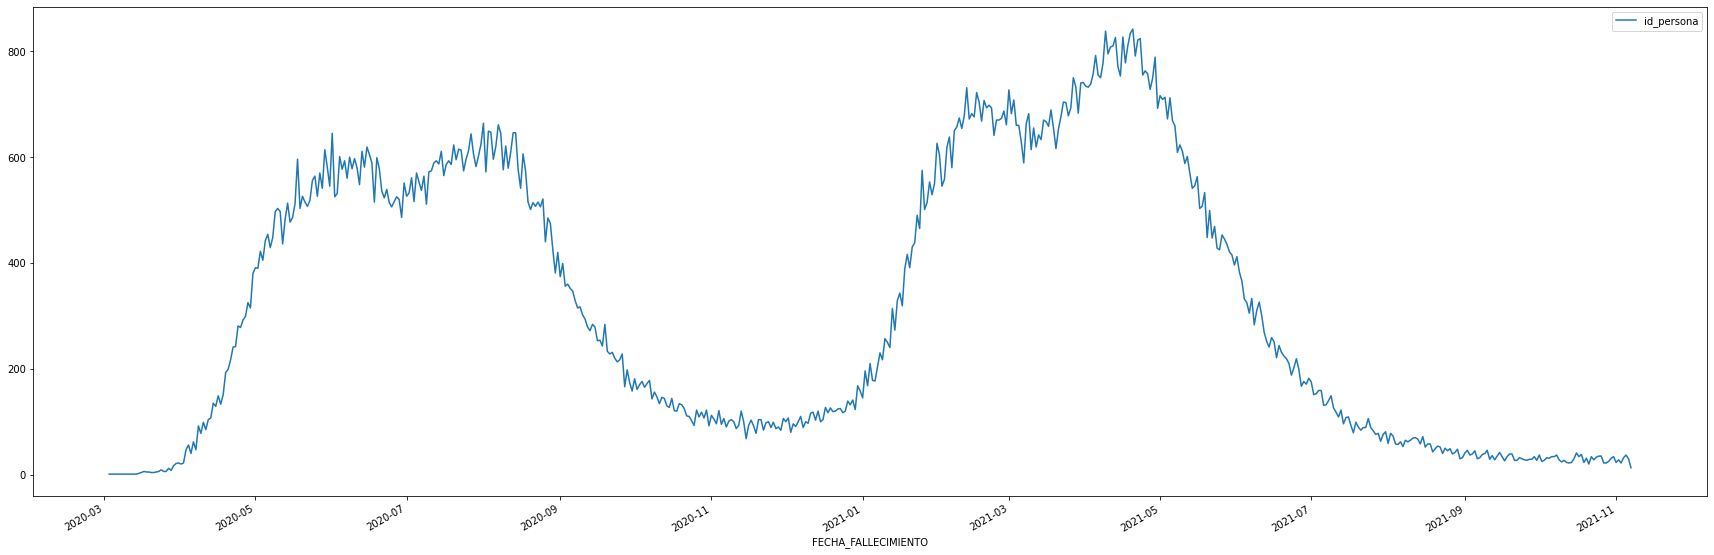

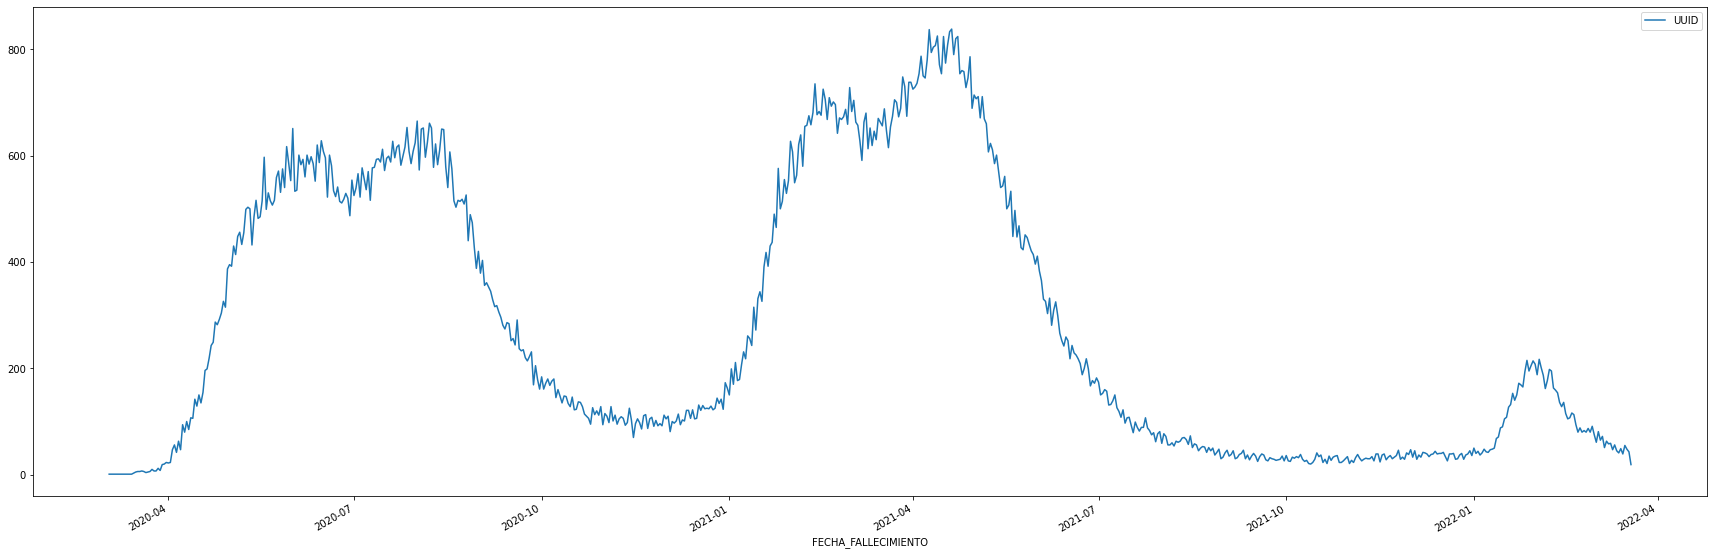

In [49]:
df[["FECHA_FALLECIMIENTO","UUID"]].groupby("FECHA_FALLECIMIENTO").count().plot(figsize=(30,10))  # para que salga la etiqueta UUID

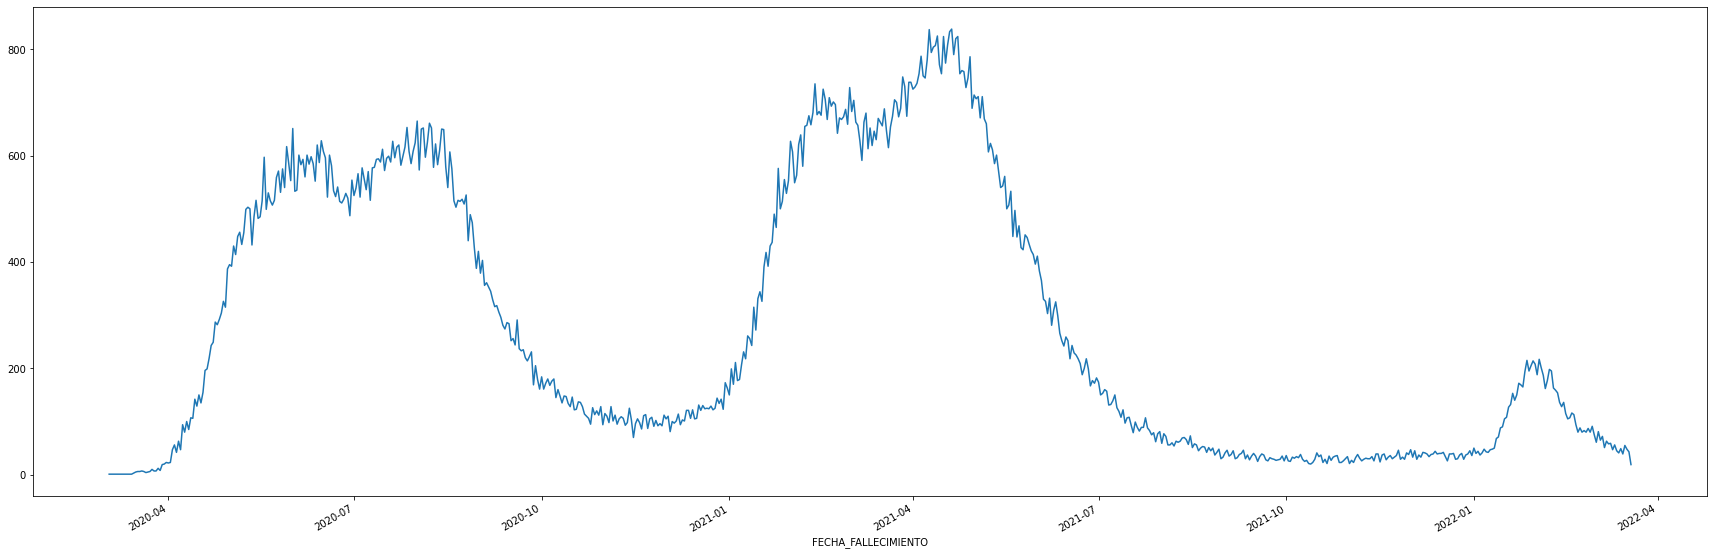

In [48]:
df.groupby("FECHA_FALLECIMIENTO").size().plot(figsize=(30,10))

Pregunta 9: Mostrar la gráfica de la cantidad de fallecidos por cada día del departamento de JUNIN. En el eje X debe estar la fecha y el eje Y debe mostrar la cantidad de fallecidos. Usar plot. (1 pto)  

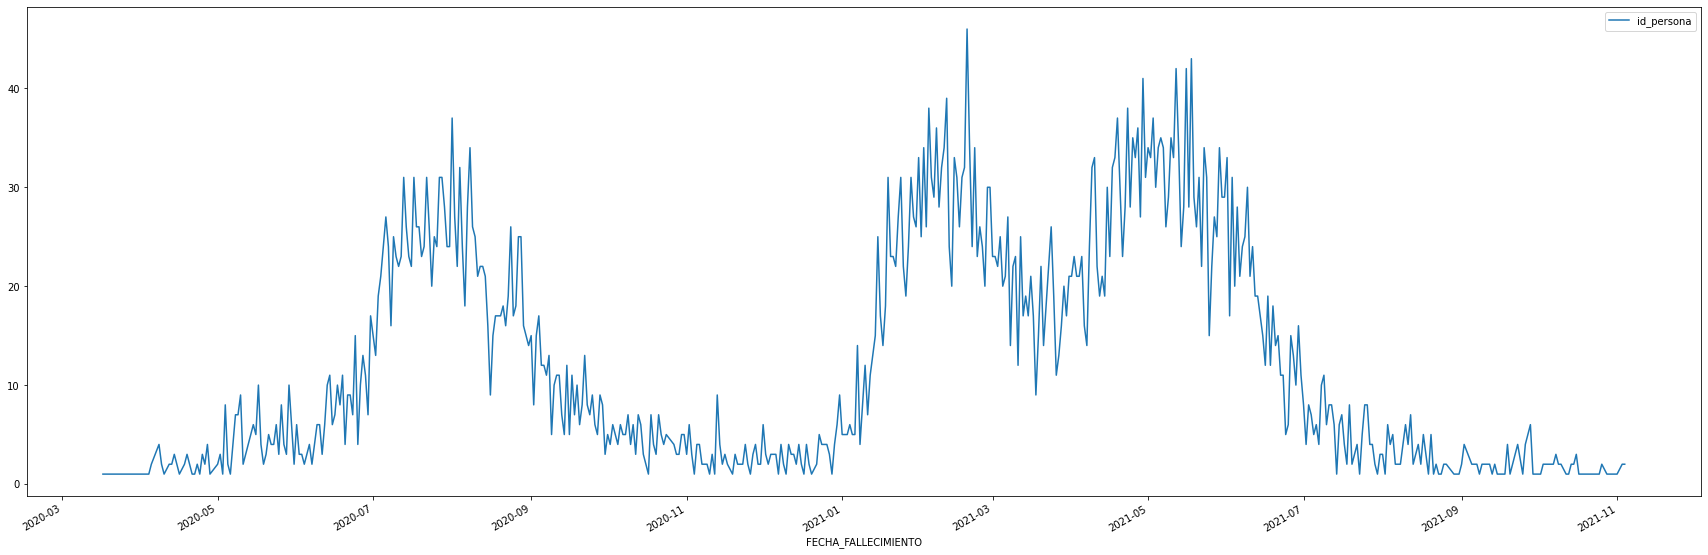

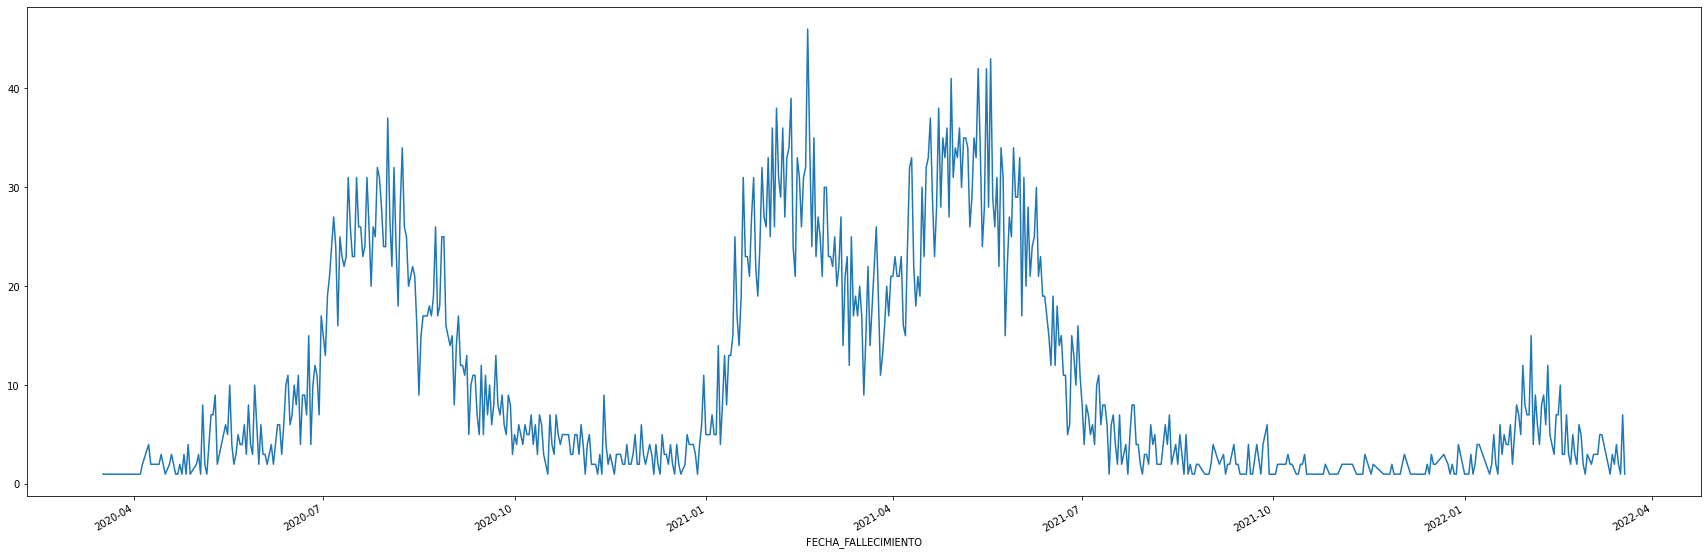

In [50]:
df[df["DEPARTAMENTO"]=="JUNIN"].groupby("FECHA_FALLECIMIENTO").size().plot(figsize=(30,10))

Pregunta 10: Mostrar tres gráficas a la vez de la cantidad de fallecidos en promedio por cada 7 días del distrito de EL TAMBO, HUANCAYO Y CHILCA. En el eje X debe estar la fecha y el eje Y debe mostrar la cantidad de fallecidos. Usar plot. (2 pto)  

Text(0.5, 1.0, 'FALLECIDOS POR DISTRITO EL TAMBO, HUANCAYO, CHILCA')

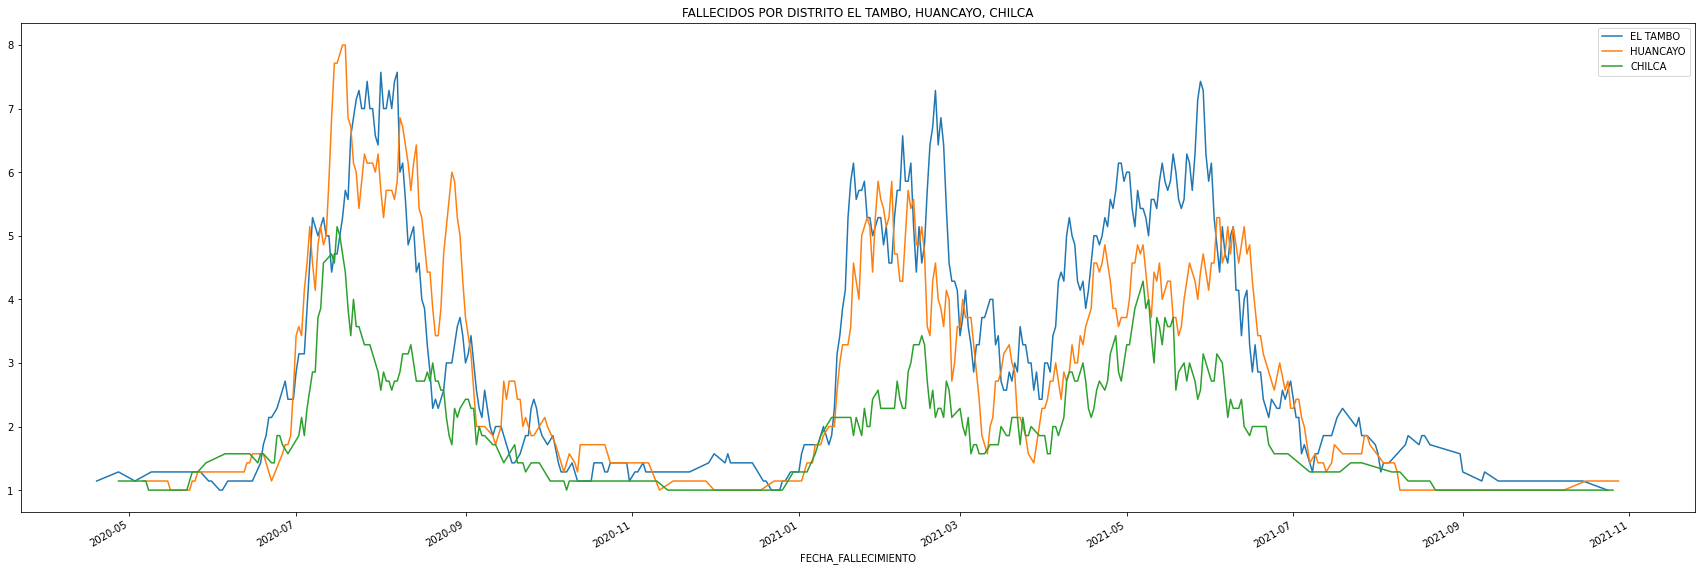

Text(0.5, 1.0, 'FALLECIDOS POR DISTRITO')

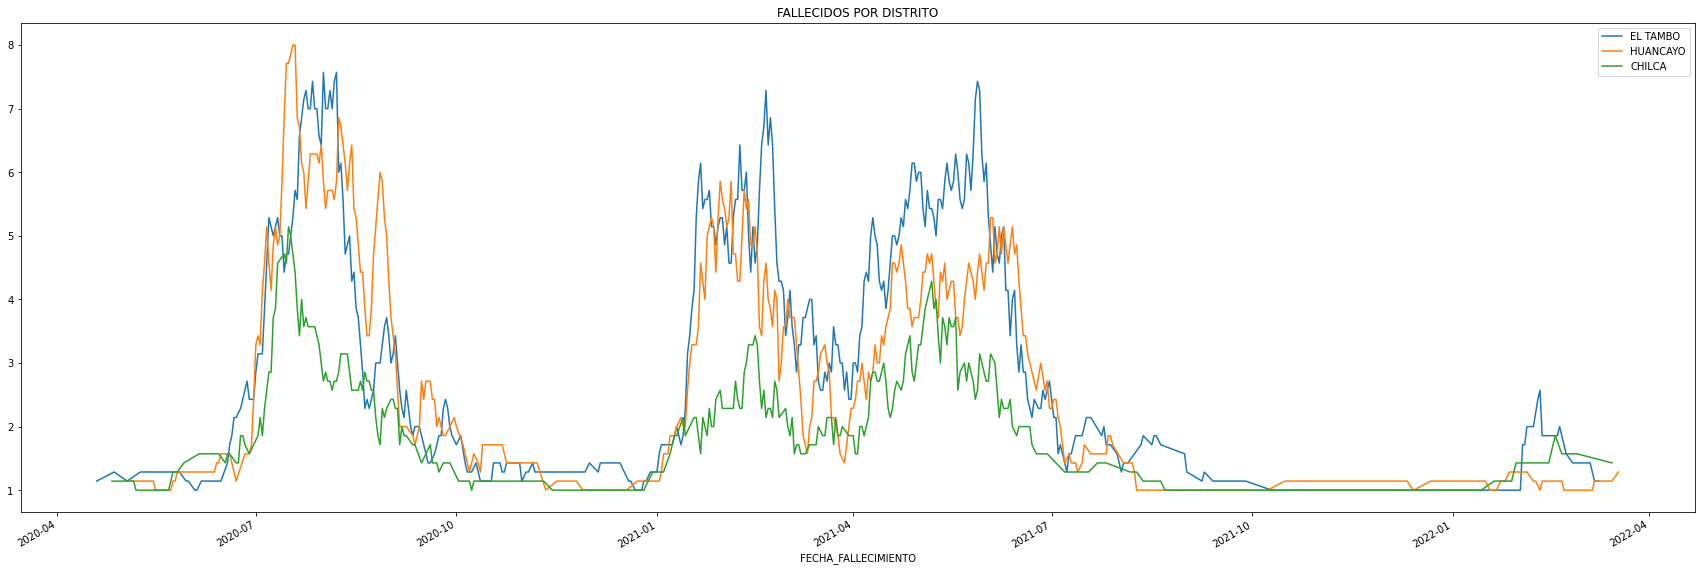

In [59]:
df[df["DISTRITO"]=="EL TAMBO" ].groupby("FECHA_FALLECIMIENTO").size().rolling(7).mean().plot(figsize=(30,10))
df[df["DISTRITO"]=="HUANCAYO"].groupby("FECHA_FALLECIMIENTO").size().rolling(7).mean().plot(figsize=(30,10))
df[(df["DISTRITO"]=="CHILCA") ].groupby("FECHA_FALLECIMIENTO").size().rolling(7).mean().plot(figsize=(30,10))

plt.legend(["EL TAMBO","HUANCAYO","CHILCA"])
plt.title("FALLECIDOS POR DISTRITO")

Pregunta 11: Mostrar la gráfica de la cantidad de fallecidos
desde el mes de septiembre hacia adelante del departamento JUNIN. En el eje X debe estar la fecha y el eje Y debe mostrar la cantidad de fallecidos. Usar plot. (2 pto)

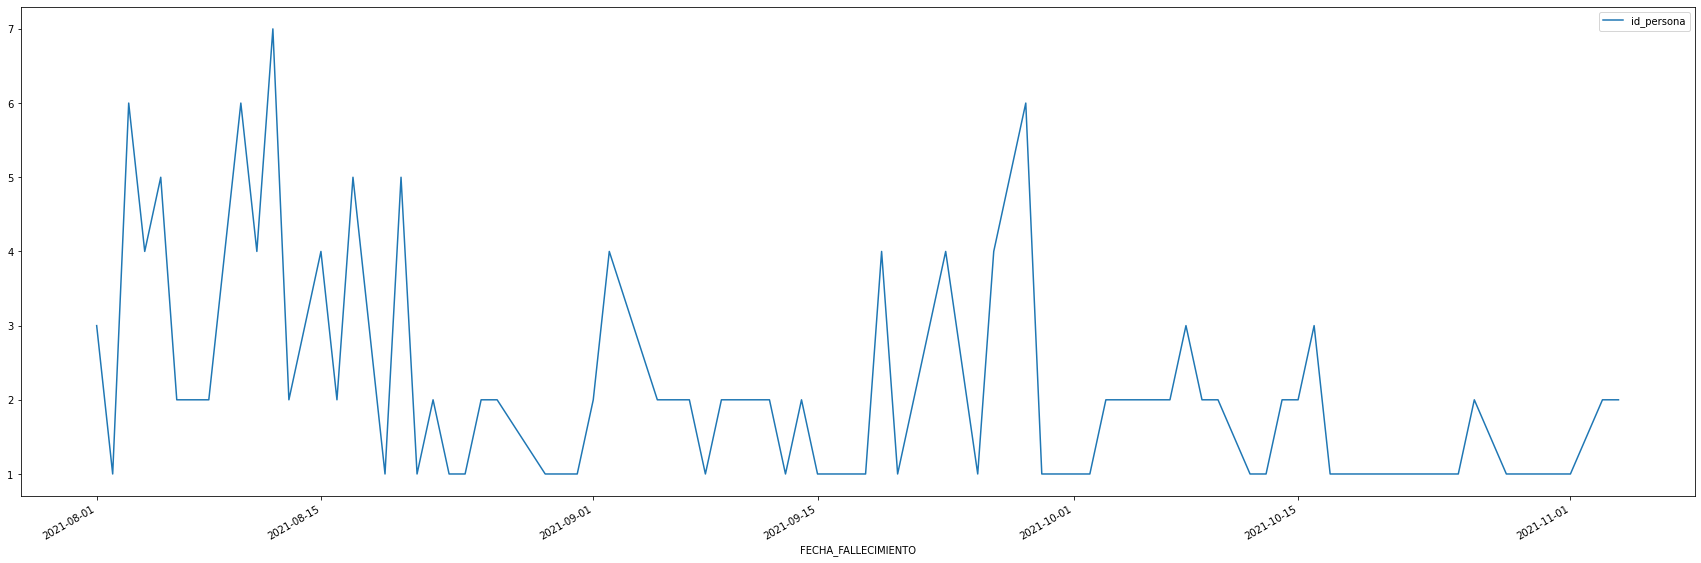

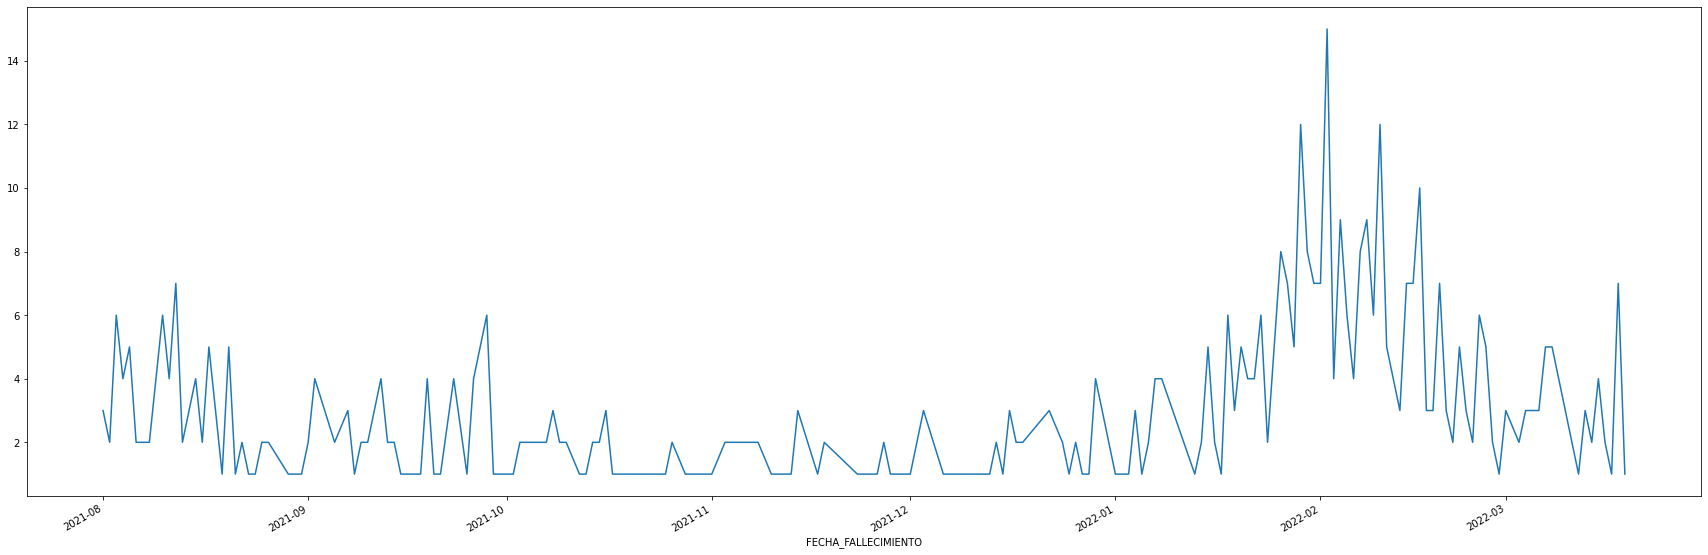

In [75]:
df[(df["DEPARTAMENTO"]=="JUNIN") & (df["FECHA_FALLECIMIENTO"]>="20210801")].groupby("FECHA_FALLECIMIENTO").size().plot(figsize=(30,10))

In [77]:
df

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,UUID
0,2022-03-19,2021-04-23,41,MASCULINO,Criterio virolÃ³gico,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143,24769779.0
1,2022-03-19,2021-06-07,31,FEMENINO,Criterio SINADEF,CALLAO,CALLAO,CALLAO,070101,24742499.0
2,2022-03-19,2021-07-08,27,FEMENINO,Criterio SINADEF,LIMA,LIMA,CARABAYLLO,150106,24742552.0
3,2022-03-19,2021-05-18,62,MASCULINO,Criterio virolÃ³gico,JUNIN,TARMA,TARMA,120701,24633504.0
4,2022-03-19,2021-05-19,74,MASCULINO,Criterio virolÃ³gico,LIMA,LIMA,SANTA ANITA,150137,24633522.0
...,...,...,...,...,...,...,...,...,...,...
208288,2022-03-19,2021-05-14,74,MASCULINO,Criterio SINADEF,LA LIBERTAD,OTUZCO,USQUIL,130614,18924935.0
208289,2022-03-19,2021-03-26,64,FEMENINO,Criterio SINADEF,HUANUCO,HUANUCO,AMARILIS,100102,18847957.0
208290,2022-03-19,2021-06-03,65,MASCULINO,Criterio serolÃ³gico,JUNIN,JAUJA,YAUYOS,120434,18848024.0
208291,2022-03-19,2021-03-13,57,FEMENINO,Criterio virolÃ³gico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132,18848046.0


In [79]:
df.iloc[:,:-1]

,FECHA_CORTE,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,CLASIFICACION_DEF,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO
0,2022-03-19,2021-04-23,41,MASCULINO,Criterio virolÃ³gico,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,150143
1,2022-03-19,2021-06-07,31,FEMENINO,Criterio SINADEF,CALLAO,CALLAO,CALLAO,070101
2,2022-03-19,2021-07-08,27,FEMENINO,Criterio SINADEF,LIMA,LIMA,CARABAYLLO,150106
3,2022-03-19,2021-05-18,62,MASCULINO,Criterio virolÃ³gico,JUNIN,TARMA,TARMA,120701
4,2022-03-19,2021-05-19,74,MASCULINO,Criterio virolÃ³gico,LIMA,LIMA,SANTA ANITA,150137
...,...,...,...,...,...,...,...,...,...
208288,2022-03-19,2021-05-14,74,MASCULINO,Criterio SINADEF,LA LIBERTAD,OTUZCO,USQUIL,130614
208289,2022-03-19,2021-03-26,64,FEMENINO,Criterio SINADEF,HUANUCO,HUANUCO,AMARILIS,100102
208290,2022-03-19,2021-06-03,65,MASCULINO,Criterio serolÃ³gico,JUNIN,JAUJA,YAUYOS,120434
208291,2022-03-19,2021-03-13,57,FEMENINO,Criterio virolÃ³gico,LIMA,LIMA,SAN JUAN DE LURIGANCHO,150132


In [80]:
df.iloc[:,-1].values

array([24769779., 24742499., 24742552., ..., 18848024., 18848046.,
       18848073.])